In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import numpy as np
from scipy.stats import t
warnings.filterwarnings('ignore')

In [27]:
# Load Dataset
df = pd.read_excel('C:/Users/Rieze/Desktop/prog assignment/Mine_Dataset.xls')

<b>NOTE</b> <br>
Voltage (V): Output voltage value of FLC sensor due to magnetic distortion <br>
High (H): The height of the sensor from the ground. <br>
Soil Type (S):6 different soil types depending on the moisture condition. <br>
Mine Type (M): Mine types commonly encountered on land. 5 different mine classes.


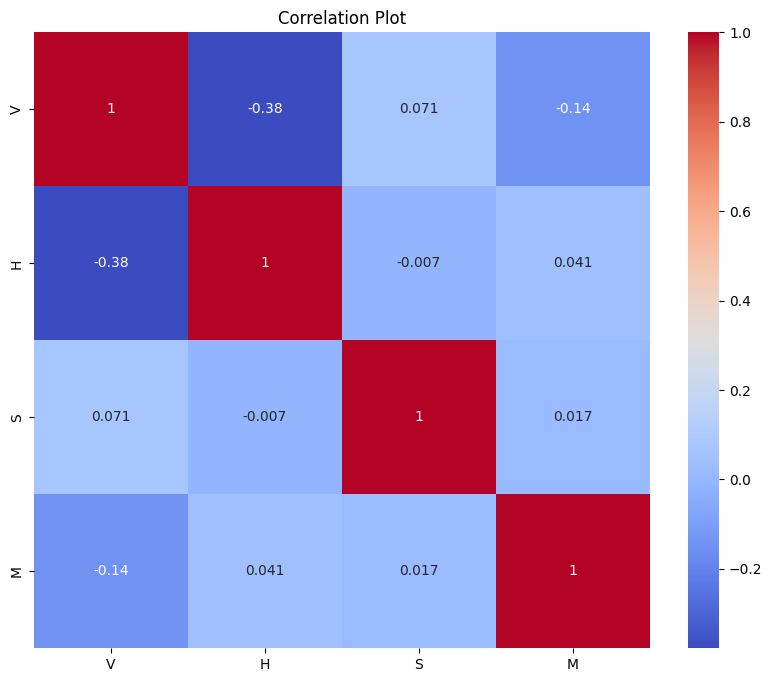

In [28]:
# Correlation Plot
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Plot')
plt.show()

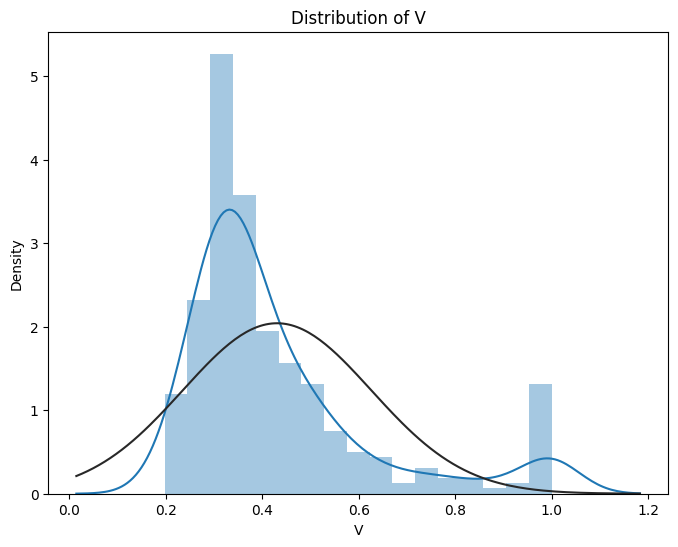

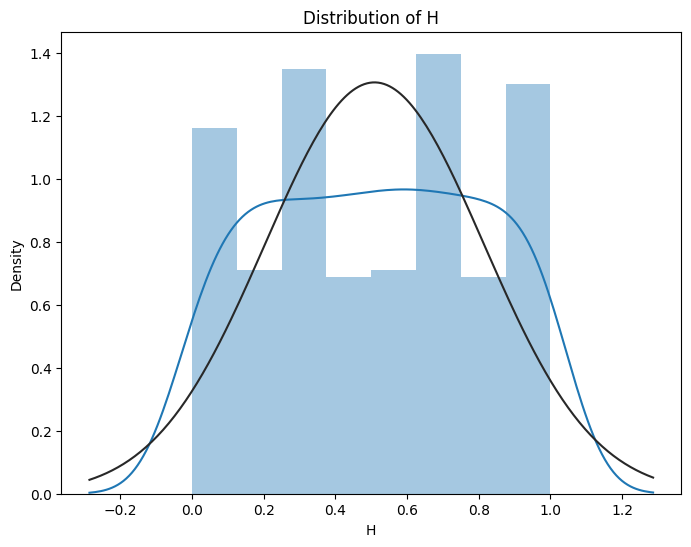

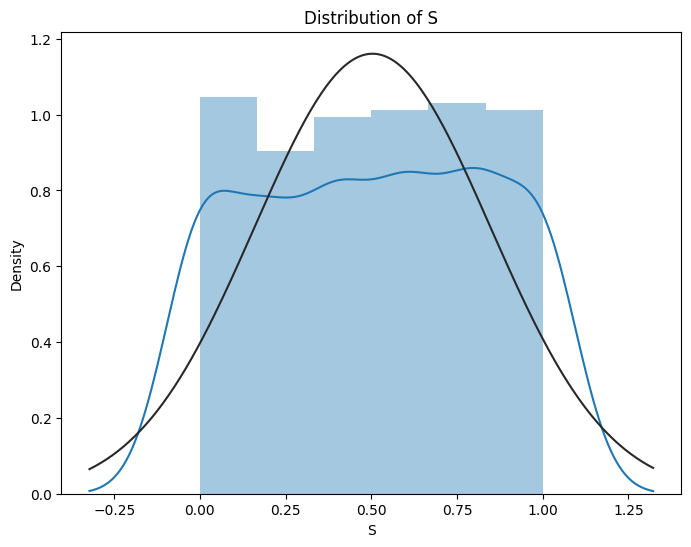

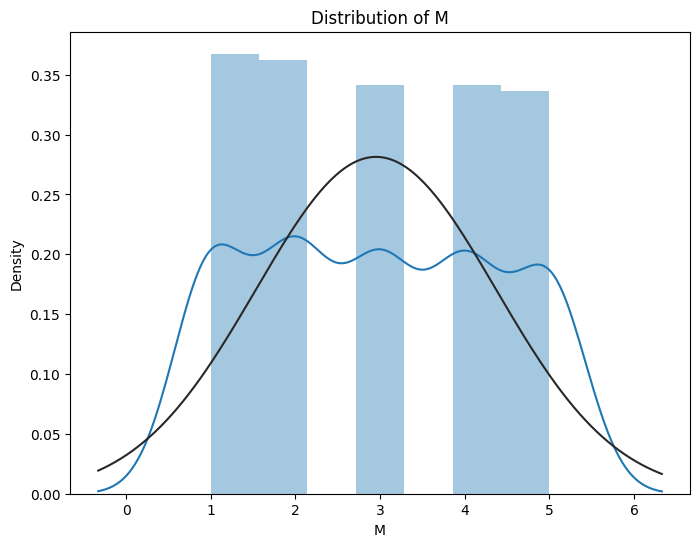

In [29]:
# Create a function to plot the distribution of each column
def plot_distribution(df, col):
    plt.figure(figsize=(8, 6))
    sns.distplot(df[col], fit=stats.norm)
    plt.title(f'Distribution of {col}')
    plt.show()

# Apply the function to each column
for col in df.columns:
    plot_distribution(df, col)

In [30]:
# Summary Statistics
summary_stats = df.describe()
print(summary_stats)

                V           H           S           M
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


In [31]:
col1 = df['V']
col2 = df['M']

def ttest_ind_from_scratch(col1, col2):
    n1, n2 = len(col1), len(col2)
    mean1, mean2 = np.mean(col1), np.mean(col2)
    sd1, sd2 = np.std(col1), np.std(col2)

    t_statistic = (mean1 - mean2) / np.sqrt( (sd1**2 / n1) + (sd2**2 / n2) )
    degrees_freedom = n1 + n2 - 2

    p_value = 2 * t.cdf(-np.abs(t_statistic), degrees_freedom)

    alpha = 0.05
    if p_value < alpha:
        result = "Reject the null hypothesis - There is a significant correlation."
    else:
        result = "Fail to reject the null hypothesis - There is no significant correlation."

    return t_statistic, p_value, result

t_statistic, p_value, result = ttest_ind_from_scratch(col1, col2)
print(f'Correlation coefficient: {t_statistic}')
print(f'P-value: {p_value}')
print(result)

Correlation coefficient: -32.40125982729041
P-value: 1.4239571058956258e-139
Reject the null hypothesis - There is a significant correlation.
